尽管你可能没有关注过篮球赛事，但你一定听过科比·布莱恩特这个名字，这位与乔丹齐名的篮球巨星。科比在1996年的选秀大会上以第十三顺位的身份步入了职业联赛，此后他一直为洛杉矶湖人队效力，表现出了对球队的忠诚与热爱。他在2016年宣布退役，结束了辉煌的职业生涯。
科比五次帮助湖人队夺得NBA总冠军，两次获得FMVP，一次获得MVP，四次荣获AMVP，并十八次入选全明星阵容。他的生涯总得分超过三万三千分，无疑是一位未来将入驻名人堂的伟大球员。
然而，在今年的1月26日，科比所乘坐的私人飞机失事。这场意外带走了科比以及他的二女儿吉安娜的生命，他们将永远留在我们心中。

# 该数据集目标分析
1、读取科比职业生涯的数据
2、对该数据进行一个探索性分析
3、建立集成的算法模型
4、模型调参、选择最优的模型参数
5、对测试及进行预测

## 一、读取数据

In [1]:
# 导入第三方库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

# 忽略警告
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw = pd.read_csv('/Users/fangcheng/sklearn/项目二：科比生涯数据集分析/kobe_data.csv')
raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:
raw.shape

(30697, 25)

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

由上述结果可以看出，该数据集共有25个特征，其中24个特征都是完整的，并且只有shot_made_flag这个特征是存在缺失值的。那么接下来我们会将数据集切分为两部分，将含有shot_made_flag的数据集作为训练集，缺失shot_made_flag的数据集作为测试集。通过对训练集进行建模，来预测测试集上的shot_made_flag值。

In [5]:
raw.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
action_type,30697,57,Jump Shot,18880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
combined_shot_type,30697,6,Jump Shot,23485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_event_id,30697.0,NaN,NaN,NaN,249.1908,150.003712,2.0,110.0,253.0,368.0,659.0
game_id,30697.0,NaN,NaN,NaN,24764065.868065,7755174.890198,20000012.0,20500077.0,20900354.0,29600474.0,49900088.0
lat,30697.0,NaN,NaN,NaN,33.953192,0.087791,33.2533,33.8843,33.9703,34.0403,34.0883
loc_x,30697.0,NaN,NaN,NaN,7.110499,110.124578,-250.0,-68.0,0.0,95.0,248.0
loc_y,30697.0,NaN,NaN,NaN,91.107535,87.791361,-44.0,4.0,74.0,160.0,791.0
lon,30697.0,NaN,NaN,NaN,-118.26269,0.110125,-118.5198,-118.3378,-118.2698,-118.1748,-118.0218
minutes_remaining,30697.0,NaN,NaN,NaN,4.885624,3.449897,0.0,2.0,5.0,8.0,11.0
period,30697.0,NaN,NaN,NaN,2.519432,1.153665,1.0,1.0,3.0,3.0,7.0


# 二、数据探索性分析
## 单变量分析

In [6]:
#正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

Text(0.5, 1.0, '科比职业生涯不同出手类型的次数统计')

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

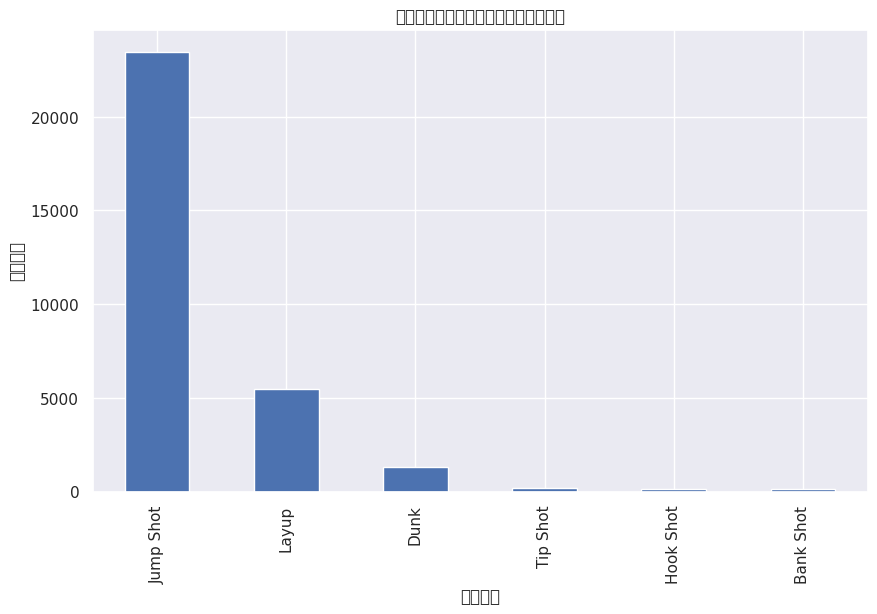

In [7]:
#查看科比出手类型的分布
plt.figure(figsize = (10,6))
raw['combined_shot_type'].value_counts().plot(kind = 'bar')
plt.xlabel("出手类型");plt.ylabel("出手次数");plt.title("科比职业生涯不同出手类型的次数统计")

由上图可知，科比最喜欢的进攻方式就是跳投，紧接着是上篮。（没有安装“SimHei”字体，所以导致图表标题等出现方框，有需求的可以下载并安装相应的字体）

(array([0, 1]), [Text(0, 0, '2PT Field Goal'), Text(1, 0, '3PT Field Goal')])

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

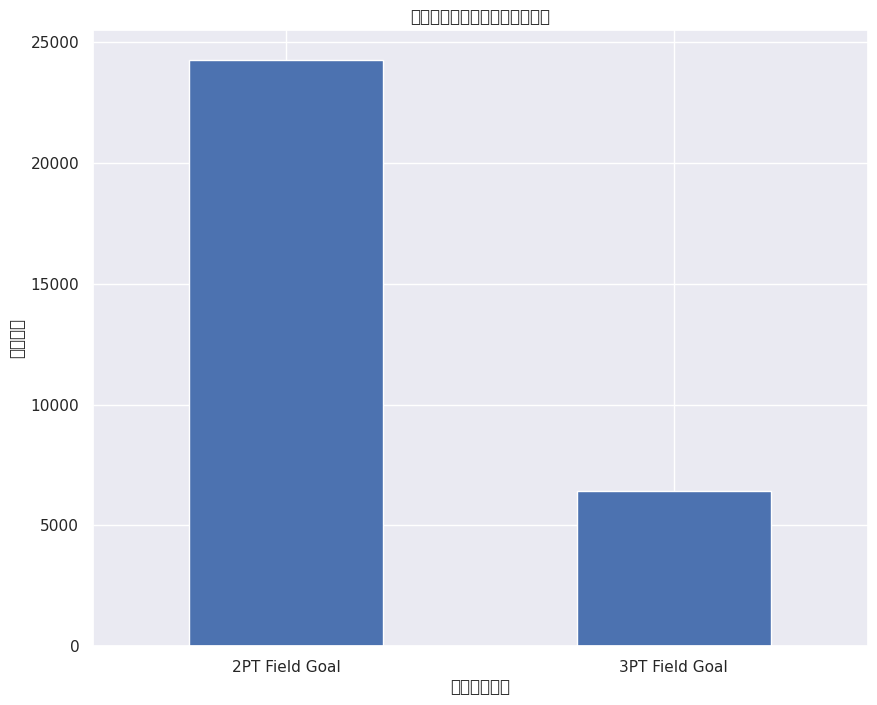

In [8]:
# 查看科比两分球、三分球的分数
plt.figure(figsize = (10,8))
raw['shot_type'].value_counts().plot(kind='bar')
plt.xlabel('远投还是中投');
plt.ylabel('出手次数');
plt.title('科比职业生涯远投及中投出手数');
plt.xticks(rotation=0)

由上图克制，科比的进攻手段主要以中投为主，就是我们比较熟悉的急停跳投、翻身跳投、干拔跳投等

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

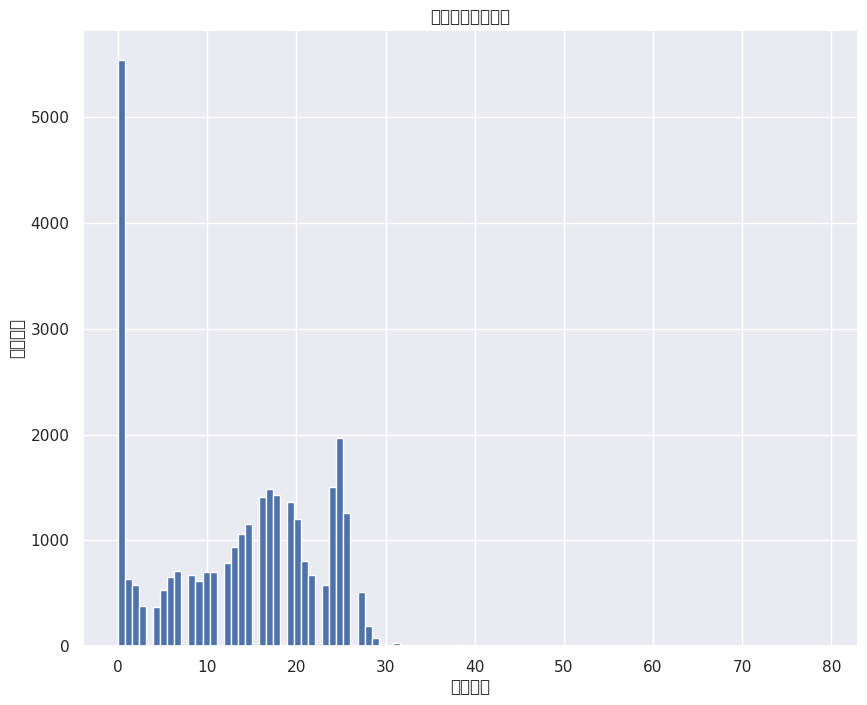

In [10]:
# 查看科比出手时的距离分布
# 查看科比两分球、三分球的分数
plt.figure(figsize = (10,8))
raw['shot_distance'].hist(bins=100)
plt.xlabel('出手距离');
plt.ylabel('出手次数');
plt.title('科比出手距的分布');

Text(0.5, 1.0, '科比出手距离的分布')

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

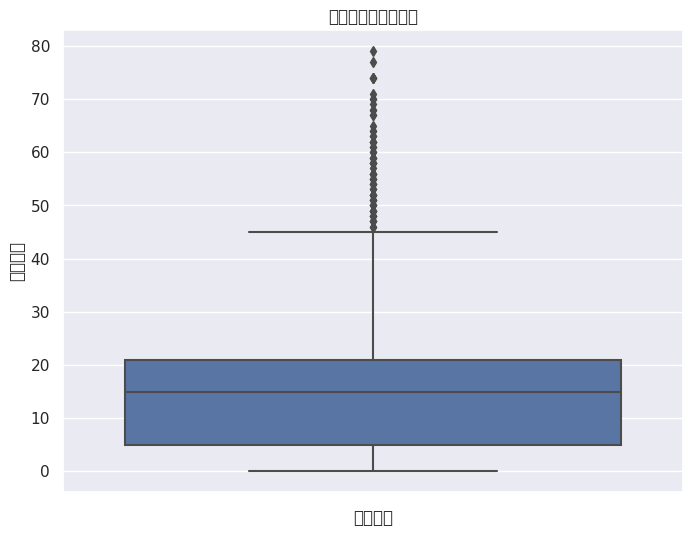

In [11]:
#绘制箱型图
plt.figure(figsize = (8,6))
sns.boxplot(data = raw,y = 'shot_distance')
plt.xlabel('出手距离');
plt.ylabel('出手次数');
plt.title('科比出手距离的分布')

由上图可以看出科比在篮下的出手最多，大约有6000次，大约75%的出手为2分球，25%的三分球。

Text(0.5, 1.0, 'shot_zone_range')

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

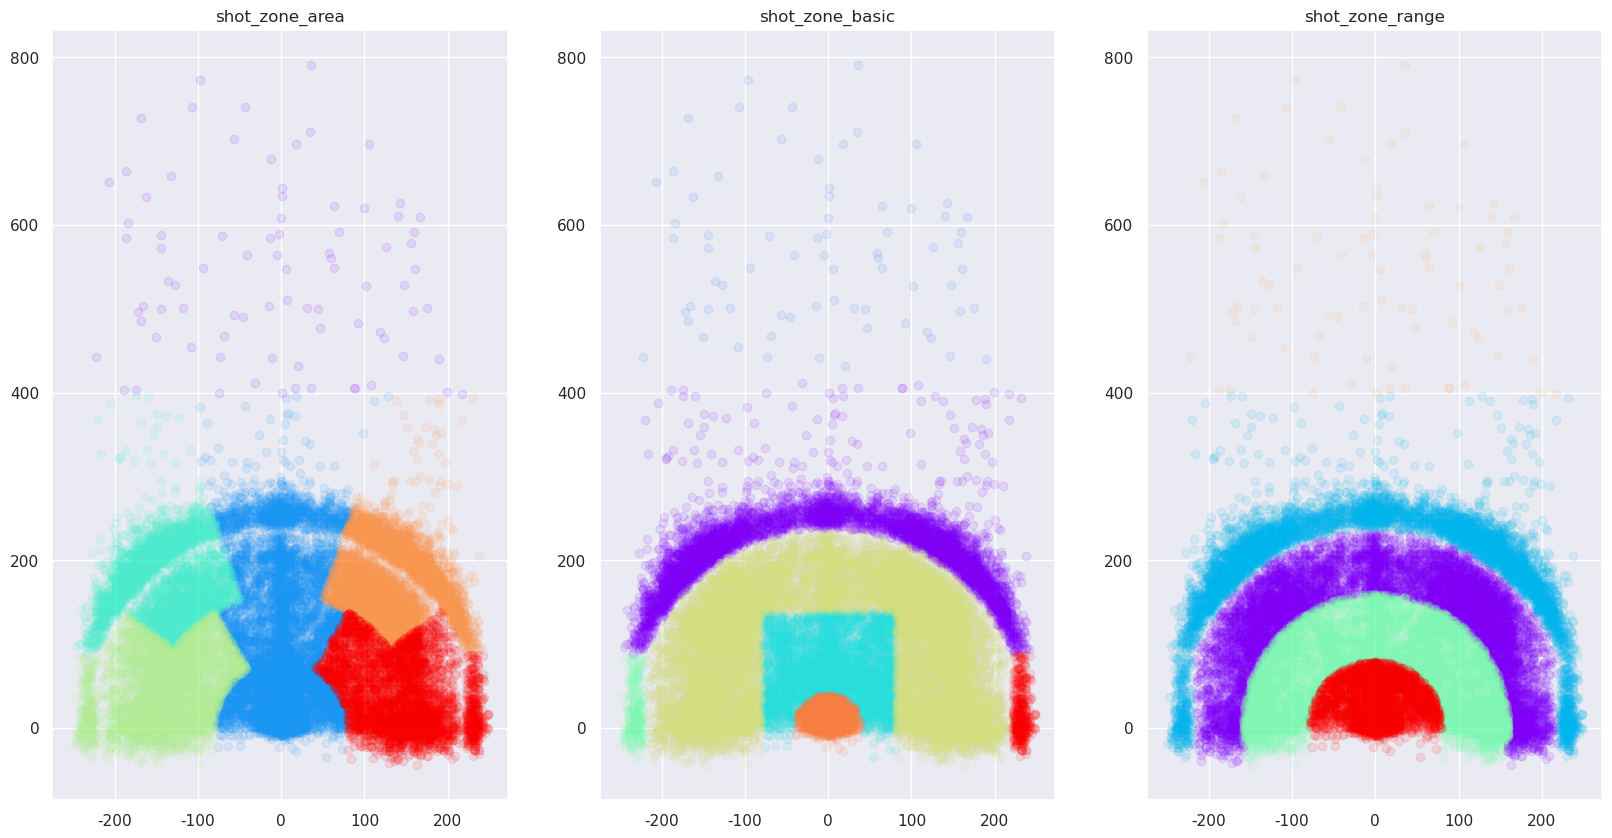

In [15]:
# 可视化科比的出手区域，按照不同的标准划分出手区域
import matplotlib.cm as cm
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = raw.groupby(feat)
    cs = cm.rainbow(np.linspace(0,1,len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x,g[1].loc_y,color=c,alpha=alpha)


plt.subplot(1,3,1)
scatter_plot_by_category(raw['shot_zone_area'])
plt.title('shot_zone_area')

plt.subplot(1,3,2)
scatter_plot_by_category(raw['shot_zone_basic'])
plt.title('shot_zone_basic')

plt.subplot(1,3,3)
scatter_plot_by_category(raw['shot_zone_range'])
plt.title('shot_zone_range')

In [16]:
raw['shot_distance'].describe()

count    30697.000000
mean        13.437437
std          9.374189
min          0.000000
25%          5.000000
50%         15.000000
75%         21.000000
max         79.000000
Name: shot_distance, dtype: float64

### 双变量分析

In [17]:
#将shot_made_falg非空的数据集提出来，也就是我们的训练集
kobe = raw[pd.notnull(raw['shot_made_flag'])]
print(kobe.shape)

(25697, 25)


In [20]:
kobe['shot_made_flag'] = kobe['shot_made_flag'].astype(np.object)

AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Text(0.5, 1.0, '科比的出手命中率')

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

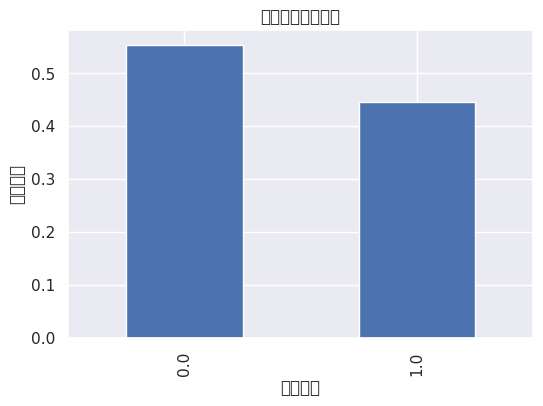

In [21]:
#查看科比的出手命中率
plt.figure(figsize = (6,4))
kobe['shot_made_flag'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel('命中情况');plt.ylabel('命中个数');plt.title('科比的出手命中率')

该样本只是整个数据集中的部分样本，不能反映出其职业生涯的真实命中率。可以看出科比的出手命中率大约为44%，还是挺高的命中率。

<Axes: xlabel='combined_shot_type', ylabel='shot_made_flag'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

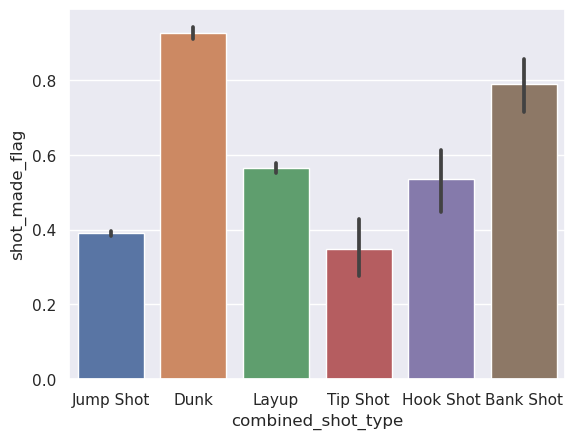

In [22]:
#观察不同出手类型与命中率之间的关系

sns.barplot(data = kobe,x = 'combined_shot_type',y = 'shot_made_flag')

由上图可知，命中率从高往低依次为：扣篮-擦板-上篮-勾手-跳投-补篮

<Axes: xlabel='shot_type', ylabel='shot_made_flag'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

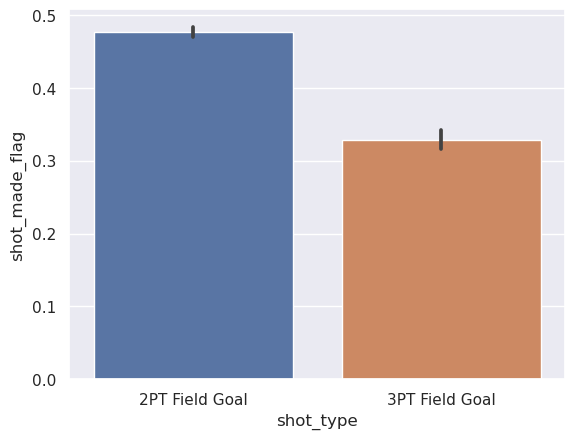

In [23]:
#观察两分球与三分球的命中率

sns.barplot(data = kobe,x = 'shot_type',y = 'shot_made_flag')

In [24]:
kobe.groupby('shot_type')['shot_made_flag'].value_counts(normalize = True)

shot_type       shot_made_flag
2PT Field Goal  0.0               0.522652
                1.0               0.477348
3PT Field Goal  0.0               0.670732
                1.0               0.329268
Name: shot_made_flag, dtype: float64

由上述结果可以看出科比的两分球命中率为47.7%，三分球的命中率为32.9%。

<Axes: xlabel='shot_distance', ylabel='shot_made_flag'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

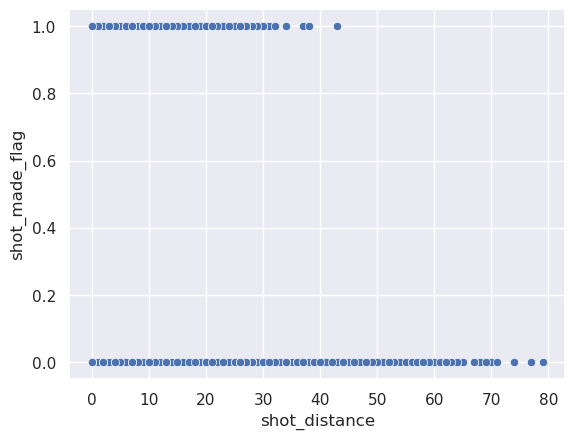

In [25]:
#观察出手距离与命中率之间的关系
sns.scatterplot(data = kobe, x = 'shot_distance',y = 'shot_made_flag' )

<Axes: xlabel='shot_made_flag', ylabel='shot_distance'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

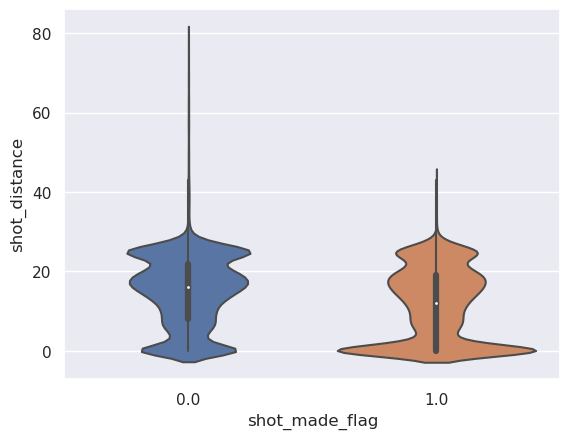

In [26]:
sns.violinplot(data = kobe, y = 'shot_distance',x = 'shot_made_flag' )

由上图可以看出，出手距离越远，命中率越低，出手超过43英尺的都没有命中。

### 数据预处理

In [27]:
raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [28]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [29]:
#删除对最终预测结果无影响的id特征

drop_ids = ['game_event_id','game_id','team_id','shot_id']
for feature in drop_ids:
    raw = raw.drop(feature,axis = 1)

In [30]:
#创建一个新的特征time_remaining，用于替代minutes_remaining和seconds_remaining

raw['time_remaining'] = raw['minutes_remaining']*60 + raw['seconds_remaining']

In [31]:
#删除minutes_remaining和seconds_remaining特征

raw = raw.drop(['minutes_remaining','seconds_remaining'],axis = 1)

In [32]:
raw['season'].unique()

array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '1996-97', '1997-98',
       '1998-99', '1999-00'], dtype=object)

In [33]:
#将season数据处理为更简单易懂的格式
raw['season'] = raw['season'].apply(lambda x:int(x.split('-')[1]))
raw['season'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 97,
       98, 99,  0])

In [34]:
#lat,lon,loc_x,loc_y表达的是相同的含义，删除lat,lon特征
raw = raw.drop(['lat','lon'],axis = 1)

In [35]:
#action_type和combined_shot_type表达的含义相近，删除action_type
raw = raw.drop(['action_type'],axis = 1)

In [36]:
#shot_zone_area,shot_zone_basic,shot_zone_range表达的也是相同的含义，保留一个就行
raw = raw.drop(['shot_zone_basic','shot_zone_range'],axis = 1)

In [37]:
#team_name和game_date对最终的预测结果也没什么影响，删除这两个特征
raw = raw.drop(['team_name','game_date'],axis = 1)

In [38]:
#matchup和opponent表达的是相同的意思，保留opponent就行
raw = raw.drop('matchup',axis = 1)

In [39]:
#查看当前数据集的信息
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   combined_shot_type  30697 non-null  object 
 1   loc_x               30697 non-null  int64  
 2   loc_y               30697 non-null  int64  
 3   period              30697 non-null  int64  
 4   playoffs            30697 non-null  int64  
 5   season              30697 non-null  int64  
 6   shot_distance       30697 non-null  int64  
 7   shot_made_flag      25697 non-null  float64
 8   shot_type           30697 non-null  object 
 9   shot_zone_area      30697 non-null  object 
 10  opponent            30697 non-null  object 
 11  time_remaining      30697 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.8+ MB


其中combined_shot_type,shot_type,shot_zone_area,opponent为object类型，对这几个特征做one_hot_enncoding编码。

In [40]:
raw = pd.get_dummies(raw)
raw.head()

,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,time_remaining,combined_shot_type_Bank Shot,combined_shot_type_Dunk,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,167,72,1,0,1,18,NaN,627,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-157,0,1,0,1,15,0.0,622,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-101,135,1,0,1,16,1.0,465,0,0,...,0,0,1,0,0,0,0,0,0,0
3,138,175,1,0,1,22,0.0,412,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2,0,1,0,1.0,379,0,1,...,0,0,1,0,0,0,0,0,0,0


In [41]:
#将数据集分为训练集和测试集

train_data = raw[pd.notnull(raw['shot_made_flag'])]
test_data = raw[pd.isnull(raw['shot_made_flag'])]

print('训练集的大小:',train_data.shape)
print('测试集的大小:',test_data.shape)

训练集的大小: (25697, 55)
测试集的大小: (5000, 55)


由于该测试集没有标签，所以我们需要通过交叉验证的方式将训练集分为训练样本和验证样本，用验证集来评估模型的好坏。最终选取最好的模型，对测试样本进行预测。

In [42]:
#准备数据，将训练数据分为特征个标签，删掉测试数据中的shot_made_flag列

train_labels = train_data['shot_made_flag']
train_features = train_data.drop('shot_made_flag',axis = 1)

test_features = test_data.drop('shot_made_flag',axis = 1)

### 建立随机森林模型

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

#初始化一个随机森林模型
RFC = RandomForestClassifier()

#使用网格搜索gridsearchcv寻找最佳的模型参数
param_grid = {'n_estimators':[40,80,120,160,200],
             'max_depth':[3,4,5,6,7,8,9,10],
             'min_samples_split':[3,4,5,6,7]}
grid = GridSearchCV(RFC,param_grid = param_grid,cv = 5,verbose = 2,n_jobs = -1)
t1 = time.time()
grid.fit(train_features,train_labels)
t2 = time.time()
print('模型的训练时间{}'.format(t2 - t1))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
模型的训练时间138.7400848865509


In [44]:
#打印最好的模型参数
grid.best_params_

{'max_depth': 8, 'min_samples_split': 6, 'n_estimators': 40}

In [45]:
best_model = grid.best_estimator_

In [46]:
test_flag = best_model.predict(test_features)

In [47]:
print(test_flag[:10])

[0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]


In [48]:
#将预测的结果存为CSV文件
# test_data.to_csv('/Users/fangcheng/sklearn/项目二：科比生涯数据集分析kobe_prediction.csv')

[CV] END ..max_depth=3, min_samples_split=3, n_estimators=80; total time=   0.5s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=160; total time=   0.9s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=200; total time=   1.0s
[CV] END .max_depth=3, min_samples_split=4, n_estimators=120; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=4, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=160; total time=   0.8s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END .max_depth=3, min_samples_split=6, n_estimators=120; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=6, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=3, min_samples_split=7, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=7, n_estimators=120; total time=   0.7s
[CV] END .max_depth=3, min_s

[CV] END ..max_depth=3, min_samples_split=3, n_estimators=40; total time=   0.2s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=120; total time=   0.6s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=160; total time=   0.8s
[CV] END ..max_depth=3, min_samples_split=4, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=4, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=4, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=4, n_estimators=160; total time=   0.8s
[CV] END ..max_depth=3, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END .max_depth=3, min_s

[CV] END ..max_depth=3, min_samples_split=3, n_estimators=40; total time=   0.2s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=120; total time=   0.6s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=160; total time=   0.9s
[CV] END ..max_depth=3, min_samples_split=4, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=4, n_estimators=80; total time=   0.5s
[CV] END .max_depth=3, min_samples_split=4, n_estimators=120; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=4, n_estimators=200; total time=   1.1s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END ..max_depth=3, min_samples_split=6, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=6, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_s

[CV] END ..max_depth=3, min_samples_split=3, n_estimators=40; total time=   0.2s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=120; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=3, min_samples_split=4, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=4, n_estimators=120; total time=   0.6s
[CV] END .max_depth=3, min_samples_split=4, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END ..max_depth=3, min_samples_split=6, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=6, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=6, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_s

[CV] END ..max_depth=3, min_samples_split=3, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=120; total time=   0.6s
[CV] END .max_depth=3, min_samples_split=3, n_estimators=200; total time=   1.1s
[CV] END .max_depth=3, min_samples_split=4, n_estimators=120; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=4, n_estimators=160; total time=   0.9s
[CV] END ..max_depth=3, min_samples_split=5, n_estimators=40; total time=   0.2s
[CV] END ..max_depth=3, min_samples_split=5, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=120; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=5, n_estimators=160; total time=   0.9s
[CV] END ..max_depth=3, min_samples_split=6, n_estimators=80; total time=   0.4s
[CV] END .max_depth=3, min_samples_split=6, n_estimators=120; total time=   0.7s
[CV] END .max_depth=3, min_samples_split=6, n_estimators=160; total time=   0.9s
[CV] END ..max_depth=3, min_